In [60]:
import numpy as np
import pandas as pd
import mne
import dit
from dit.multivariate import total_correlation,dual_total_correlation,coinformation
from more_itertools import windowed
from matplotlib import pyplot as plt
%config InlineBackend.figure_format='retina'

In [61]:
def mneraw_to_df(raw):
    data_df      = raw.to_data_frame()
    # only 1min of data (if rest)
    data_df = data_df[(0<=data_df.time) & (data_df.time<=60)]
    # keep only useful channels
    data_df = data_df.drop(columns=['time','ECG ECG','EEG A2-A1'])
    return data_df

def rolling_window(series,size,step):
    return [np.array(w) for w in windowed(series,n=size,step=step)]

def boolean_joint_distribution(*variables):
    def joint_symbols_to_string(symbols):
        return np.array2string(symbols,separator='')[1:-1]
    joint_symbols,frequencies = np.unique(list(zip(*variables)), axis=0, return_counts=True)
    symbol_strings            = list(map(joint_symbols_to_string,joint_symbols))
    distribution              = dit.Distribution(symbol_strings, frequencies/sum(frequencies))
    return distribution

def Oinfo(*rvs):
    dist = boolean_joint_distribution(*rvs)
    O    = total_correlation(dist)-dual_total_correlation(dist)
    return O

def total_corr(*rvs):
    dist = boolean_joint_distribution(*rvs)
    tc    = total_correlation(dist)
    return tc

def dual_total_corr(*rvs):
    dist = boolean_joint_distribution(*rvs)
    dtc    = dual_total_correlation(dist)
    return dtc

In [82]:
raw = mne.io.read_raw_edf(r"C:\Users\rober\NeuNet\ArithmeticTasks\data\Subject31_1.edf",preload=True)

Extracting EDF parameters from C:\Users\rober\NeuNet\ArithmeticTasks\data\Subject31_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...


In [83]:
delta = raw.copy().filter(l_freq=None, h_freq=4);
theta = raw.copy().filter(l_freq=4, h_freq=8);
alpha = raw.copy().filter(l_freq=8, h_freq=12);
beta = raw.copy().filter(l_freq=12, h_freq=35);
low = raw.copy().filter(l_freq=None, h_freq=12);
high = raw.copy().filter(l_freq=12, h_freq=None);

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 825 samples (1.650 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 825 samples (1.65

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 12.00
- Lower transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 10.50 Hz)
- Filter length: 551 samples (1.102 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.0s finished


In [34]:
%matplotlib inline

In [84]:
all_df  = mneraw_to_df(raw)
high_df = mneraw_to_df(high)
low_df  = mneraw_to_df(low)

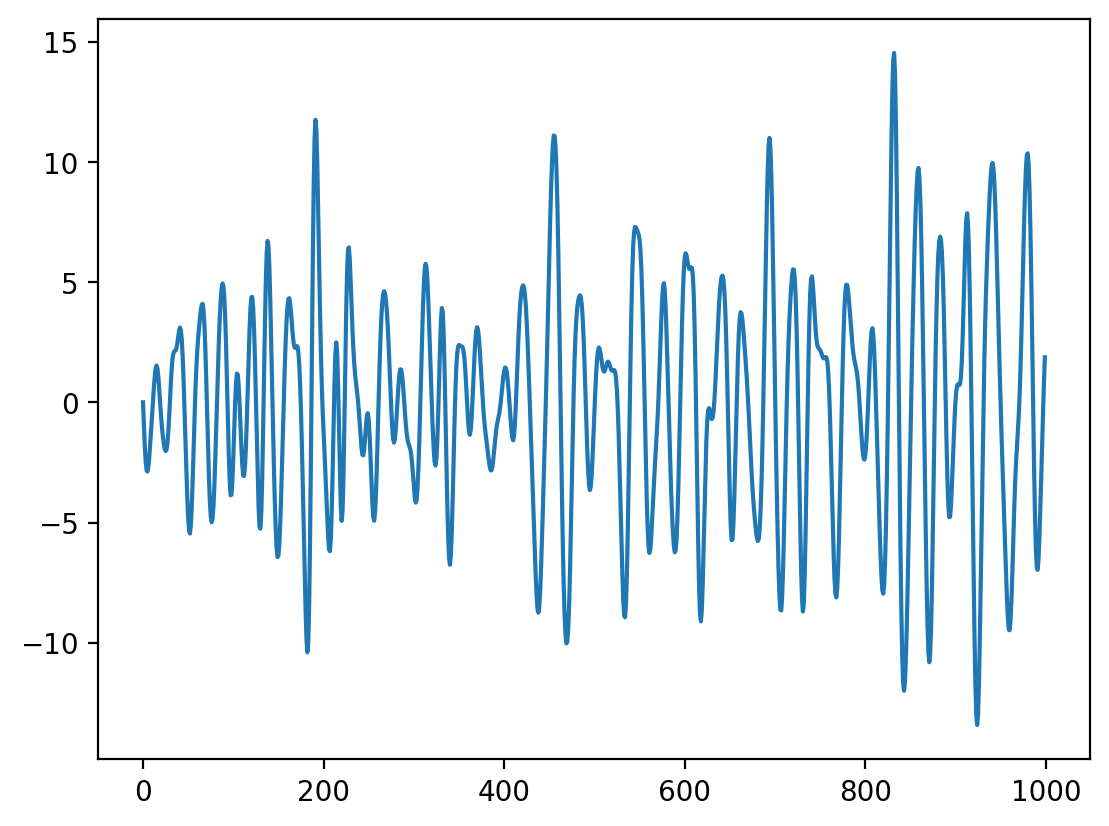

In [85]:
plt.plot(high_df['EEG C3'][:1000])

In [86]:
size,step = 2000,1000
wsch1 = [np.where(w>np.median(w),1,0) for w in rolling_window(low_df['EEG Fp1'],size,step)[:-1]]
wsch2 = [np.where(w>np.median(w),1,0) for w in rolling_window(low_df['EEG F3'],size,step)[:-1]]
wsch3 = [np.where(w>np.median(w),1,0) for w in rolling_window(low_df['EEG F7'],size,step)[:-1]]
wsch4 = [np.where(w>np.median(w),1,0) for w in rolling_window(low_df['EEG C3'],size,step)[:-1]]

In [87]:
OI3 = [Oinfo(w1,w2,w3) for w1,w2,w3 in zip(wsch1,wsch2,wsch4)]

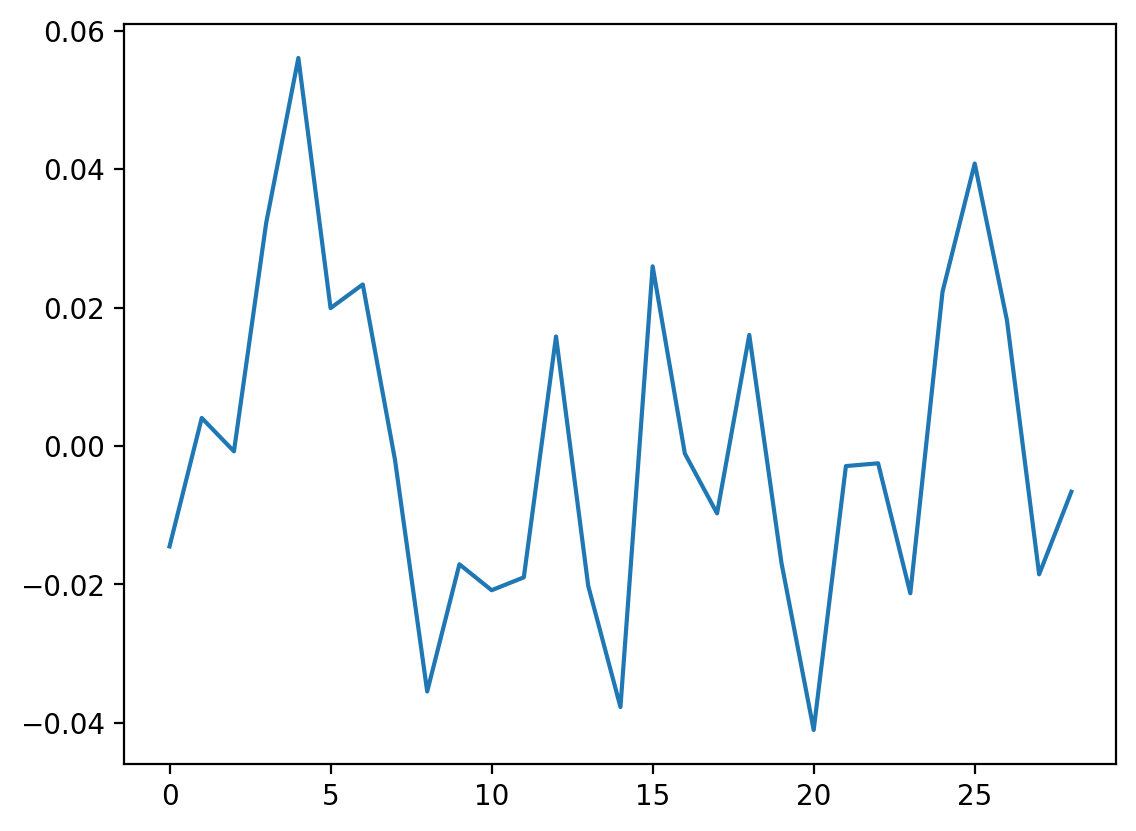

In [88]:
plt.plot(OI3)

In [78]:
b1 = np.where(high_df['EEG Fp1']>np.median(high_df['EEG Fp1']),1,0)
b2 = np.where(high_df['EEG F3']>np.median(high_df['EEG F3']),1,0)
b3 = np.where(high_df['EEG C3']>np.median(high_df['EEG C3']),1,0)

distro = boolean_joint_distribution(b1,b2,b3)
print(dit.pid.PID_WB(distro))

+--------+--------+--------+
| I_min  |  I_r   |   pi   |
+--------+--------+--------+
| {0:1}  | 0.2754 | 0.0084 |
|  {0}   | 0.1545 | 0.0000 |
|  {1}   | 0.2670 | 0.1126 |
| {0}{1} | 0.1545 | 0.1545 |
+--------+--------+--------+


In [80]:
b1 = np.where(low_df['EEG Fp1']>np.median(low_df['EEG Fp1']),1,0)
b2 = np.where(low_df['EEG F3']>np.median(low_df['EEG F3']),1,0)
b3 = np.where(low_df['EEG C3']>np.median(low_df['EEG C3']),1,0)

distro = boolean_joint_distribution(b1,b2,b3)
print(dit.pid.PID_WB(distro))

+--------+--------+--------+
| I_min  |  I_r   |   pi   |
+--------+--------+--------+
| {0:1}  | 0.2873 | 0.0148 |
|  {0}   | 0.0958 | 0.0000 |
|  {1}   | 0.2725 | 0.1767 |
| {0}{1} | 0.0958 | 0.0958 |
+--------+--------+--------+


In [81]:
b1 = np.where(all_df['EEG Fp1']>np.median(all_df['EEG Fp1']),1,0)
b2 = np.where(all_df['EEG F3']>np.median(all_df['EEG F3']),1,0)
b3 = np.where(all_df['EEG C3']>np.median(all_df['EEG C3']),1,0)

distro = boolean_joint_distribution(b1,b2,b3)
print(dit.pid.PID_WB(distro))

+--------+--------+--------+
| I_min  |  I_r   |   pi   |
+--------+--------+--------+
| {0:1}  | 0.2893 | 0.0118 |
|  {0}   | 0.0953 | 0.0000 |
|  {1}   | 0.2775 | 0.1822 |
| {0}{1} | 0.0953 | 0.0953 |
+--------+--------+--------+
